In [1]:
# Imports
import json
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [2]:

devEUI = 'dead2483dead0003'
EXP_PATH = "exp/exp_device_7"

DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'


#Data Extraction

df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))
#print(downlinks_data)

35
155


In [3]:
def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)

[5, 5, 4, 4, 3, 2, 2, 2, 2, 1, 1, 0, 5, 5, 5, 5, 3, 2, 2, 1, 0, 0, 2, 2, 2, 3, 3, 5, 5, 0, 0, 5, 5, 0, 0]


[7, 7, 8, 8, 9, 10, 10, 10, 10, 11, 11, 12, 7, 7, 7, 7, 9, 10, 10, 11, 12, 12, 10, 10, 10, 9, 9, 7, 7, 12, 12, 7, 7, 12, 12]


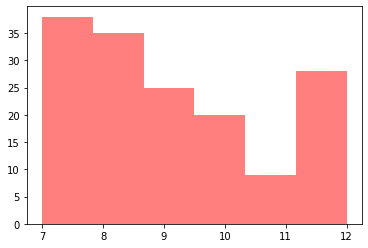

In [4]:
down_gateways, down_sf, down_dr =  get_downlink_parameters(downlinks)
down_dr = dr_to_sf(dr_down)
print(down_dr)
up_sf, up_ch =  get_uplink_parameters(uplinks)

num_bins = 6
#n, bins, patches = plt.hist(down_dr, num_bins, facecolor='green', alpha=0.5)
#n, bins, patches = plt.hist(down_sf, num_bins, facecolor='blue', alpha=0.5)
n, bins, patches = plt.hist(up_sf, num_bins, facecolor='red', alpha=0.5)
plt.show()

In [5]:
def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)

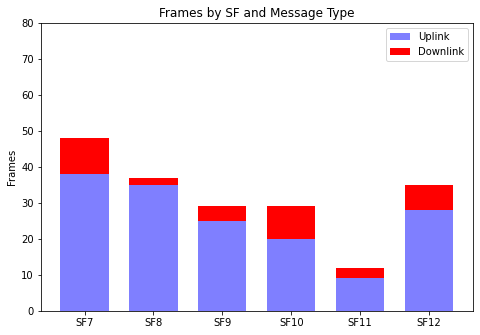

In [6]:
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=0.5)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Uplink', 'Downlink'])
plt.savefig('img/up_down.png')
plt.show()

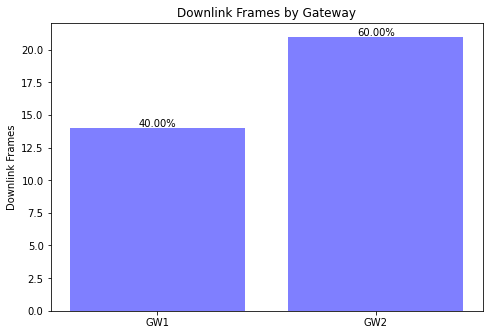

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531323f007000')],color = 'blue',alpha=0.5)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
plt.savefig('img/gateways.png')
plt.show()

<class 'numpy.ndarray'>
['867.3', '868.1', ' 867.9', '868.5', '867.1', '868.3', '867.7', '867.5']
[2, 3, 3, 41, 46, 2, 1, 57]


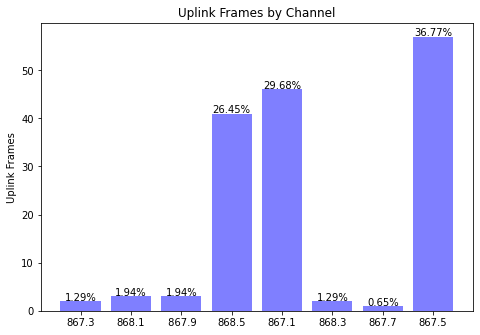

In [8]:
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
#print(up_ch)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)
print(type(channels))
channels = ['867.3', '868.1',' 867.9', '868.5', '867.1', '868.3', '867.7', '867.5']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=0.5)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
plt.savefig('img/up_ch.png')
plt.show()

In [9]:

down_processed = []
for d in downlinks_data :
    fOpts = d['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(fOpts)
    if(len(fOpts) == 1):
        fOpts = fOpts [0]
        chMask = fOpts['payload']['chMask']
        if (sum(chMask) == 1):
            down_processed.append(d)
            
print(len(down_processed))
print('Downlinks : ',len(downlinks_data))

15
Downlinks :  35


In [10]:
count = 0
count_ack_dr = 0
count_ack_tp = 0
count_ack_ch = 0
for u in uplinks_data:
    fOpts = u['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(u['phyPayloadJSON']['macPayload']['fhdr']['fOpts']) 
    if (fOpts != None):
        count = count +1
        for op in fOpts:
            if (op['payload']['dataRateAck']):
                count_ack_dr = count_ack_dr +1
            if (op['payload']['powerAck']):
                count_ack_tp = count_ack_tp +1
            if (op['payload']['channelMaskAck']):
                count_ack_ch = count_ack_ch +1
            

print(count)
print (count_ack_dr)
print (count_ack_tp)
print (count_ack_ch)

28
29
27
29


In [11]:
# Downlink Extraction Rate

down_extraction_rate = (count / len(downlinks_data) )*100
print(f'Downlink Extraction Rate: {down_extraction_rate}%')

Downlink Extraction Rate: 80.0%


In [12]:

devEUI = 'dead2483dead0001'
EXP_PATH = "exp/exp_device_7"

DATA_PATH = f'{EXP_PATH}/data_{devEUI}.json'


#Data Extraction

df = pd.read_json(DATA_PATH)
#df.info()

#print(df)
gateways = []
sf = []
downlinks = df['downlinkFrame'].dropna()
uplinks = df['uplinkFrame'].dropna()
downlinks_data = []
uplinks_data = []

for d in downlinks :
    downlinks_data.append(d)
for d in uplinks :
    uplinks_data.append(d)
        
print(len(downlinks_data))
print(len(uplinks_data))
#print(downlinks_data)

39
234


In [13]:
def get_downlink_parameters(downlinks):
    gateways =[]
    sf =[]
    mac_dr  =[]
    for down in downlinks:
        if down ['phyPayloadJSON']['mhdr']['mType'] == 'UnconfirmedDataDown' :
            gateways.append(down['gatewayID'])
            sf.append(down['txInfo']['loRaModulationInfo']['spreadingFactor'])
            mac_dr.append(down ['phyPayloadJSON']['macPayload']['fhdr']['fOpts'][0]['payload']['dataRate'])
    return gateways, sf, mac_dr


def get_uplink_parameters(uplinks):
    sf =  []
    ch  =[]
    tp = []
    for up in uplinks:
        ch.append(up['txInfo'] ['frequency'])
        sf.append(up['txInfo'] ['loRaModulationInfo']['spreadingFactor'])
    return sf, ch
up_sf, up_ch =  get_uplink_parameters(uplinks)

def dr_to_sf(dr):
    sf = [12,11,10,9,8,7]
    for i in range(len(dr)) :
        dr[i] = sf[dr[i]]
    return dr

down_gateways, down_sf, dr_down =  get_downlink_parameters(downlinks)
print(dr_down)

[5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 1, 0, 0, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1, 0, 0, 2, 2, 3, 3, 5, 5, 0, 0, 0, 0, 5, 5, 0, 0]


[7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 11, 12, 12, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 10, 10, 9, 9, 7, 7, 12, 12, 12, 12, 7, 7, 12, 12]


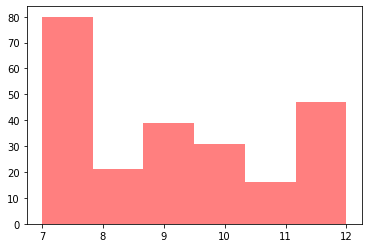

In [14]:
down_gateways, down_sf, down_dr =  get_downlink_parameters(downlinks)
down_dr = dr_to_sf(dr_down)
print(down_dr)
up_sf, up_ch =  get_uplink_parameters(uplinks)

num_bins = 6
#n, bins, patches = plt.hist(down_dr, num_bins, facecolor='green', alpha=0.5)
#n, bins, patches = plt.hist(down_sf, num_bins, facecolor='blue', alpha=0.5)
n, bins, patches = plt.hist(up_sf, num_bins, facecolor='red', alpha=0.5)
plt.show()

In [15]:
def count_sf(sfs ):
    counts =[]
    for sf in range (7,13):
        counts.append(sfs.count(sf))
    return counts

up_sf_counts = count_sf(up_sf)
down_sf_counts = count_sf(down_dr)

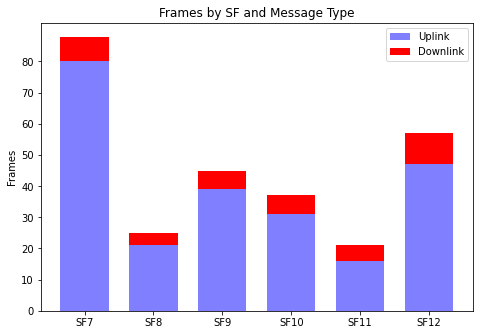

In [16]:
N = 6
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.7
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, up_sf_counts, width, color='blue',alpha=0.5)
ax.bar(ind, down_sf_counts, width,bottom=up_sf_counts, color='red',alpha=1)
ax.set_ylabel('Frames')
ax.set_title('Frames by SF and Message Type')
ax.set_xticks(ind, ('SF7', 'SF8', 'SF9', 'SF10', 'SF11','SF12'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Uplink', 'Downlink'])
plt.savefig('img/up_down.png')
plt.show()

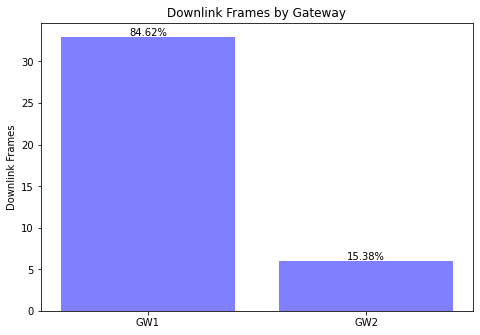

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['GW1', 'GW2']

pps = ax.bar(langs,[down_gateways.count('3235313214003900'),down_gateways.count('323531323f007000')],color = 'blue',alpha=0.5)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(down_gateways)*100)),
      ha='center')
ax.set_ylabel('Downlink Frames')
ax.set_title('Downlink Frames by Gateway')
plt.savefig('img/gateways.png')
plt.show()

<class 'numpy.ndarray'>
['867.3', '868.1', ' 867.9', '868.5', '867.1', '868.3', '867.7', '867.5']
[4, 82, 3, 5, 62, 3, 3, 72]


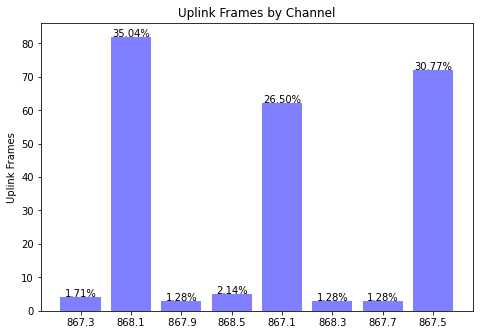

In [18]:
up_sf, up_ch =  get_uplink_parameters(uplinks)
up_ch = np.array(up_ch)
up_ch = up_ch/10**6

channels = set(up_ch)
#print(up_ch)



channel_counts = []
for ch in channels:
    channel_counts.append(np.count_nonzero(up_ch == ch))
    
channels = np.array(channels)
print(type(channels))
channels = ['867.3', '868.1',' 867.9', '868.5', '867.1', '868.3', '867.7', '867.5']
print(channels)
print(channel_counts)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


pps = ax.bar(channels,channel_counts,color = 'blue',alpha=0.5)
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{:.2f}%".format((height/len(up_ch)*100)),
      ha='center')
ax.set_ylabel('Uplink Frames')
ax.set_title('Uplink Frames by Channel')
plt.savefig('img/up_ch.png')
plt.show()

In [19]:

down_processed = []
for d in downlinks_data :
    fOpts = d['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(fOpts)
    if(len(fOpts) == 1):
        fOpts = fOpts [0]
        chMask = fOpts['payload']['chMask']
        if (sum(chMask) == 1):
            down_processed.append(d)
            
print(len(down_processed))
print('Downlinks : ',len(downlinks_data))

19
Downlinks :  39


In [26]:
count = 0
count_ack_dr = 0
count_ack_tp = 0
count_ack_ch = 0
fCnt_save = -1
for u in uplinks_data:
    fOpts = u['phyPayloadJSON']['macPayload']['fhdr']['fOpts']
    #print(u['phyPayloadJSON']['macPayload']['fhdr']['fOpts'])
    fCnt = u['phyPayloadJSON']['macPayload']['fhdr']['fCnt']
    if (fCnt >fCnt_save ):  
        if (fOpts != None):
            count = count +1
            #print( u['phyPayloadJSON']['macPayload']['fhdr']['fCnt'])
            #print()
            for op in fOpts:
                if (op['payload']['dataRateAck']):
                    count_ack_dr = count_ack_dr +1
                if (op['payload']['powerAck']):
                    count_ack_tp = count_ack_tp +1
                if (op['payload']['channelMaskAck']):
                    count_ack_ch = count_ack_ch +1
    fCnt_save = fCnt
            

print(count)
print (count_ack_dr)
print (count_ack_tp)
print (count_ack_ch)

38
38
38
38


In [27]:
# Downlink Extraction Rate

down_extraction_rate = (count / len(downlinks_data) )*100
print(f'Downlink Extraction Rate: {down_extraction_rate}%')

Downlink Extraction Rate: 97.43589743589743%
